In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data= pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_data=pd.merge(city_data, ride_data, how='left', on=["city",'city'])
# Display the data table for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
ave_fare=city_ride_data.groupby(['city', 'type']).fare.mean()
y1=city_ride_data.loc[city_ride_data['type']=='Urban'].groupby('city').fare.mean()
y2=city_ride_data.loc[city_ride_data['type']=='Suburban'].groupby('city').fare.mean()
y3=city_ride_data.loc[city_ride_data['type']=='Rural'].groupby('city').fare.mean()

drivers_per_city=city_ride_data.groupby(['city','type']).driver_count.mean()
z1=city_ride_data.loc[city_ride_data['type']=='Urban'].groupby('city').driver_count.mean()
z2=city_ride_data.loc[city_ride_data['type']=='Suburban'].groupby('city').driver_count.mean()
z3=city_ride_data.loc[city_ride_data['type']=='Rural'].groupby('city').driver_count.mean()
rides_per_city=city_ride_data.groupby(['city','type']).ride_id.count()
x1=city_ride_data.loc[city_ride_data['type']=='Urban'].groupby('city').ride_id.count()
x2=city_ride_data.loc[city_ride_data['type']=='Suburban'].groupby('city').ride_id.count()
x3=city_ride_data.loc[city_ride_data['type']=='Rural'].groupby('city').ride_id.count()

chart_data=pd.DataFrame({
    'Average Fare': ave_fare,
    'Total Drivers': drivers_per_city,
    'Total Rides': rides_per_city
})
chart_data=chart_data.reset_index()
chart_data.head()

,city,type,Average Fare,Total Drivers,Total Rides
0,Amandaburgh,Urban,24.641667,12,18
1,Barajasview,Urban,25.332273,26,22
2,Barronchester,Suburban,36.422500,11,16
3,Bethanyland,Suburban,32.956111,22,18
4,Bradshawfurt,Rural,40.064000,7,10


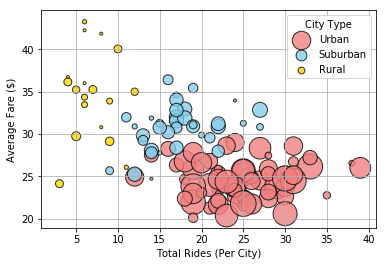

<Figure size 432x288 with 0 Axes>

In [13]:
colors={'Urban':'lightcoral','Suburban':'skyblue','Rural':'gold'}

#pyber_bubble=plt.scatter(x=chart_data['Total Rides'], 
 #                        y=chart_data['Average Fare'],
  #                       s=[n*9 for n in chart_data['Total Drivers']], 
   #                      c=chart_data['type'].apply(lambda x: colors[x]),alpha=.9, edgecolors="black")
plt.scatter(x1,y1,s=9*z1,c="lightcoral",alpha=.8,edgecolors="black",label="Urban")
plt.scatter(x2,y2,s=9*z2,c="skyblue",alpha=.8,edgecolors="black",label="Suburban")
plt.scatter(x3,y3,s=9*z3,c="gold",alpha=.8,edgecolors="black",label="Rural")
plt.legend(title="City Type")
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.show()
plt.savefig('pyber_bubble.png')


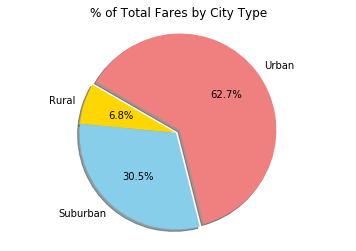

<Figure size 432x288 with 0 Axes>

In [14]:
types_df=city_ride_data.groupby('type')
totfare_by_type=types_df.fare.sum()
tot_fares=city_ride_data.fare.sum()
prop_fares=totfare_by_type/tot_fares*100
prop_fares
prop_fares=pd.DataFrame(totfare_by_type/tot_fares*100)
pie_types=['Rural','Suburban','Urban']
colors_pie=['gold','skyblue','lightcoral']
plt.title("% of Total Fares by City Type")
plt.pie(x=prop_fares['fare'], labels=pie_types, explode= [0,0,0.05],colors= colors_pie,
      autopct="%.1f%%", shadow=True,startangle=150)
plt.axis("equal")
plt.show()
plt.savefig('pyber_pie_1.png')


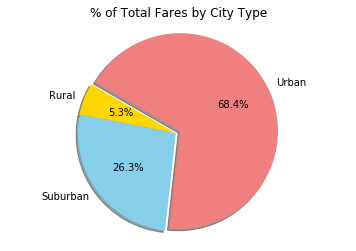

<Figure size 432x288 with 0 Axes>

In [15]:
types_df=city_ride_data.groupby('type')
totrides_by_type=types_df.ride_id.count()
tot_rides=city_ride_data.ride_id.count()
prop_rides=totrides_by_type/tot_rides*100
prop_rides
plt.title("% of Total Fares by City Type")
plt.pie(x=prop_rides, labels=pie_types, explode= [0,0,0.05],colors= colors_pie,
      autopct="%.1f%%", shadow=True,startangle=150)
plt.axis("equal")
plt.show()
plt.savefig('pyber_pie_2.png')


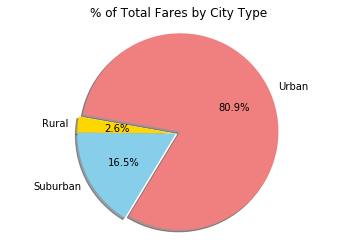

<Figure size 432x288 with 0 Axes>

In [16]:
types_df=city_ride_data.groupby('type')
totdrivers_by_type=city_ride_data.drop_duplicates('city').groupby('type').driver_count.sum()
tot_drivers=city_ride_data.drop_duplicates('city').driver_count.sum()
prop_drivers=totdrivers_by_type/tot_drivers*100
prop_drivers
plt.title("% of Total Fares by City Type")
plt.pie(x=prop_drivers, labels=pie_types, explode= [0,0,0.05],colors= colors_pie,
      autopct="%.1f%%", shadow=True,startangle=170)
plt.axis("equal")
plt.show()
plt.savefig('pyber_pie_3.png')